In [1]:
import pandas as pd
import numpy as np
import jax.numpy as jnp

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups

import matplotlib.pyplot as plt
import seaborn as sns

from pyartm.thematizer import Thematizer
import pyartm.vectorizer as vectorization

from src.cartm.model import ContextTopicModel
from src.cartm.metrics import PerplexityMetric
from src.data_prepocessing import ArticlesDataset

In [2]:
sns.set_theme()

%matplotlib inline

In [3]:
data = fetch_20newsgroups(data_home='./data/', subset='all').data
len(data)

18846

In [4]:
maxlen = 100
dataset = ArticlesDataset(data, maxlen=maxlen)
len(dataset)

18846

In [5]:
bow = CountVectorizer(
    preprocessor=lambda x: ' '.join(ArticlesDataset.preprocess_text(x)),
    tokenizer=word_tokenize,
    vocabulary=dataset.vocab,
).fit_transform(data)
bow = jnp.array(bow.todense())
# bow /= bow.sum(axis=1)[:, None]
bow.shape

/Users/diyakovilya/Library/Caches/pypoetry/virtualenvs/topic-modelling-attention-srLx0cG6-py3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/diyakovilya/Library/Caches/pypoetry/virtualenvs/topic-modelling-attention-srLx0cG6-py3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:1368: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(18846, 107673)

In [9]:
data = pd.Series(data)  #.iloc[:1000]
vectorizer = vectorization.CountVectorizer()
data = vectorizer.fit_transform(data)
data.shape, type(data)

(torch.Size([84136, 18846]), torch.Tensor)

In [10]:
model = Thematizer(
    data,
    vocab=vectorizer.vocab_,
    cache_perplexity=True,
    seed=42,
)
model.fit(n_epochs_max=75)
perp_list = model.perplexity_list

Epoch [1/75], Perplexity: 84964.52
Epoch [2/75], Perplexity: 5114.52
Epoch [3/75], Perplexity: 5087.60
Epoch [4/75], Perplexity: 5046.23
Epoch [5/75], Perplexity: 4978.63
Epoch [6/75], Perplexity: 4875.91
Epoch [7/75], Perplexity: 4735.36
Epoch [8/75], Perplexity: 4554.11
Epoch [9/75], Perplexity: 4330.52
Epoch [10/75], Perplexity: 4082.54
Epoch [11/75], Perplexity: 3847.69
Epoch [12/75], Perplexity: 3653.80
Epoch [13/75], Perplexity: 3503.59
Epoch [14/75], Perplexity: 3387.69
Epoch [15/75], Perplexity: 3296.61
Epoch [16/75], Perplexity: 3223.45
Epoch [17/75], Perplexity: 3163.47
Epoch [18/75], Perplexity: 3113.47
Epoch [19/75], Perplexity: 3071.28
Epoch [20/75], Perplexity: 3035.45
Epoch [21/75], Perplexity: 3004.91
Epoch [22/75], Perplexity: 2978.69
Epoch [23/75], Perplexity: 2956.08
Epoch [24/75], Perplexity: 2936.47
Epoch [25/75], Perplexity: 2919.34
Epoch [26/75], Perplexity: 2904.32
Epoch [27/75], Perplexity: 2891.16
Epoch [28/75], Perplexity: 2879.57
Epoch [29/75], Perplexity: 2

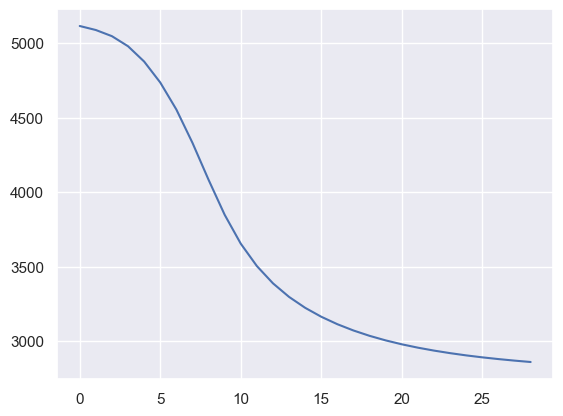

In [8]:
plt.plot(perp_list[1:])
plt.show()

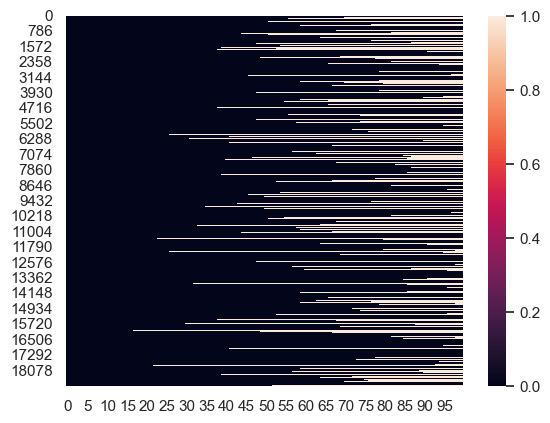

In [23]:
sns.heatmap(ArticlesDataset(data, maxlen=100).data == 1)  # == pad_token
plt.show()

In [6]:
metric_10 = PerplexityMetric(bow, words_total=dataset.data.shape[0] * dataset.data.shape[1])
model = ContextTopicModel(
    ctx_len=10,
    max_len=maxlen,
    vocab_size=len(dataset.vocab),
    n_topics=10,
    metrics=[metric_10],
    pad_token=1,
)
model.fit(dataset.data, verbose=True)

Iteration [1/1000], phi update diff norm: 0.5195
Metrics:
	PerplexityMetric: 5960.3101
Iteration [2/1000], phi update diff norm: 0.1524
Metrics:
	PerplexityMetric: 5949.0205
Iteration [3/1000], phi update diff norm: 0.1706
Metrics:
	PerplexityMetric: 5845.3394
Iteration [4/1000], phi update diff norm: 0.1981
Metrics:
	PerplexityMetric: 5686.2720
Iteration [5/1000], phi update diff norm: 0.1939
Metrics:
	PerplexityMetric: 5414.7236
Iteration [6/1000], phi update diff norm: 0.1200
Metrics:
	PerplexityMetric: 5078.0054
Iteration [7/1000], phi update diff norm: 0.0858
Metrics:
	PerplexityMetric: 4776.9639
Iteration [8/1000], phi update diff norm: 0.1877
Metrics:
	PerplexityMetric: 4559.3281
Iteration [9/1000], phi update diff norm: 0.2442
Metrics:
	PerplexityMetric: 4396.5005
Iteration [10/1000], phi update diff norm: 0.1453
Metrics:
	PerplexityMetric: 4279.5239
Iteration [11/1000], phi update diff norm: 0.0429
Metrics:
	PerplexityMetric: 4194.7378
Iteration [12/1000], phi update diff norm

In [7]:
metric_100 = PerplexityMetric(bow, words_total=dataset.data.shape[0] * dataset.data.shape[1])
model = ContextTopicModel(
    ctx_len=100,
    max_len=maxlen,
    vocab_size=len(dataset.vocab),
    n_topics=10,
    metrics=[metric_100],
    pad_token=1,
)
model.fit(dataset.data, verbose=True)

Iteration [1/1000], phi update diff norm: 0.4978
Metrics:
	PerplexityMetric: 5963.2041
Iteration [2/1000], phi update diff norm: 0.0732
Metrics:
	PerplexityMetric: 5953.9639
Iteration [3/1000], phi update diff norm: 0.0879
Metrics:
	PerplexityMetric: 5836.7939
Iteration [4/1000], phi update diff norm: 0.0952
Metrics:
	PerplexityMetric: 5669.2158
Iteration [5/1000], phi update diff norm: 0.0974
Metrics:
	PerplexityMetric: 5473.9546
Iteration [6/1000], phi update diff norm: 0.0973
Metrics:
	PerplexityMetric: 5278.7295
Iteration [7/1000], phi update diff norm: 0.0891
Metrics:
	PerplexityMetric: 5091.5542
Iteration [8/1000], phi update diff norm: 0.0786
Metrics:
	PerplexityMetric: 4912.5522
Iteration [9/1000], phi update diff norm: 0.0831
Metrics:
	PerplexityMetric: 4740.9194
Iteration [10/1000], phi update diff norm: 0.1054
Metrics:
	PerplexityMetric: 4574.6416
Iteration [11/1000], phi update diff norm: 0.1265
Metrics:
	PerplexityMetric: 4414.2085
Iteration [12/1000], phi update diff norm

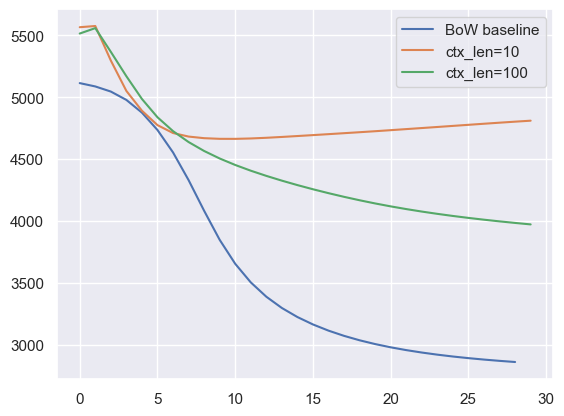

In [ ]:
# normal, diagonal dominance, early stopping
plt.plot(perp_list[1:], label='BoW baseline')
plt.plot(metric_10.history, label='ctx_len=10')
plt.plot(metric_100.history, label='ctx_len=100')
plt.legend()
plt.show()

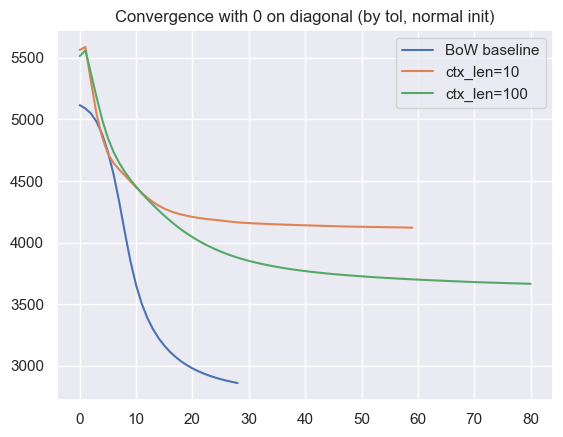

In [15]:
plt.plot(perp_list[1:], label='BoW baseline')
plt.plot(metric_10.history, label='ctx_len=10')
plt.plot(metric_100.history, label='ctx_len=100')
plt.title('Convergence with 0 on diagonal (by tol, normal init)')
plt.legend()
plt.show()

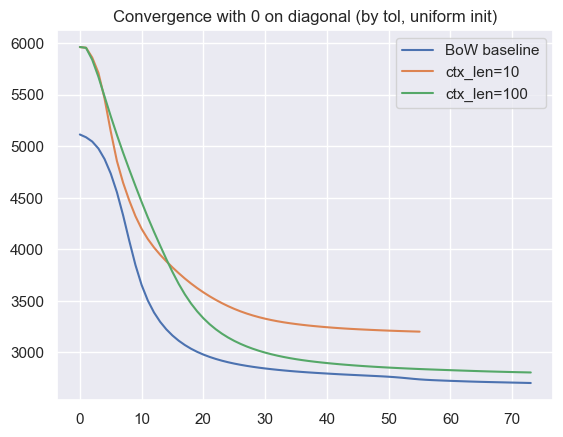

In [13]:
plt.plot(perp_list[1:], label='BoW baseline')
plt.plot(metric_10.history, label='ctx_len=10')
plt.plot(metric_100.history, label='ctx_len=100')
plt.title('Convergence with 0 on diagonal (by tol, uniform init)')
plt.legend()
plt.show()

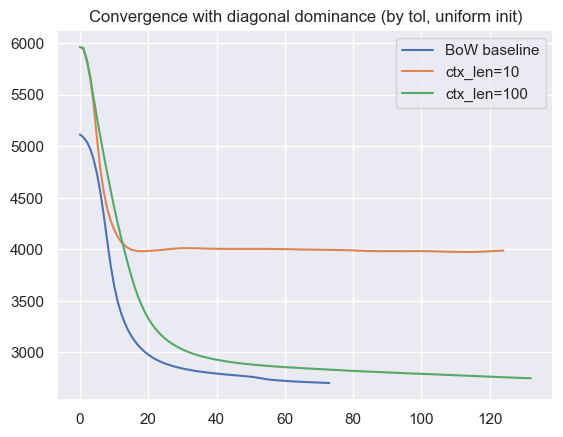

In [11]:
plt.plot(perp_list[1:], label='BoW baseline')
plt.plot(metric_10.history, label='ctx_len=10')
plt.plot(metric_100.history, label='ctx_len=100')
plt.title('Convergence with diagonal dominance (by tol, uniform init)')
plt.legend()
plt.show()